In [1]:
""" 딥 러닝이 부활한 이유
첫 번 째는
1989년 신경망 학습에 소요되는 시간(10 개의 숫자를 인식하기 위해 학습하는 시간)이 거의 3일이 걸렸음.
 제프리 힌튼이 트레이닝셋에 너무 가깝게 맞추어 학습되는 과적합 (Overfitting) 문제를 
 사전훈련(pre-trainning)하여 과적합을 방지
 2013년에는  과적합을 방지할 수 있는 Drop-out[14] 이라는 개념이 소개되면서 
 사전훈련 보다 훨씬 더 간단하고 강력한 형태로 과적합을 방지
 두 번 째는 강력한 GPU는 딥 러닝에서 복잡한 행렬 연산에 소요되는 시간을 크게 단축
 세번째는 빅 데이터
"""
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
# ******
# 신경망 모델 구성
# ******
# 입력값의 차원은 [배치크기, 특성값] 으로 되어 있음
# 손글씨 이미지는 28*28 픽셀로 이뤄져있음. 이를 784개의 feature  로 설정함

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10]) # 결과는 0 ~ 9 까지 10가지 분류
"""과적합 방지 기법 Dropout 사용"""
keep_prob = tf.placeholder(tf.float32)

In [3]:
# 신경망의 레이어 구성
# 784(입력 특성값)
# -> 256 (히든 레이어 뉴런 갯수) -> 256 
# -> 10 (결과값)

W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
# 입력값에 가중치 곱한후 ReLU 함수를 이용하여 레이어 생성
L1 = tf.nn.relu(tf.matmul(X, W1))

L1 = tf.nn.dropout(L1, keep_prob) #과적합 방지 기법 Dropout 사용

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
# L1에 가중치 곱한후 ReLU 함수를 이용하여 레이어 생성
L2 = tf.nn.relu(tf.matmul(L1, W2))
L2 = tf.nn.dropout(L2, keep_prob) #과적합 방지 기법 Dropout 사용

W3 = tf.Variable(tf.random_normal([256,10], stddev=0.01))
# 최종 모델의 출력값은 W3 변수를 곱해 10개의 분류를 가지게 됨

model = tf.matmul(L2, W3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [4]:
# ********
# 신경망 모델 학습
# ********
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(30):
    total_cost = 0
    for i in range(total_batch):
        # 텐서플로우의 mnist 모델의 next_batch 함수를 이용해
        # 지정한 크기만큼의 학습데이터 호출
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        
        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y: batch_ys, keep_prob: 0.8})
        # keep_prob 추가 !!
        total_cost += cost_val
    print('Epoch:', '%0.4d'  % (epoch + 1),
          'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))
print('최적화 완료')

Epoch: 0001 Avg. cost = 0.430
Epoch: 0002 Avg. cost = 0.166
Epoch: 0003 Avg. cost = 0.113
Epoch: 0004 Avg. cost = 0.089
Epoch: 0005 Avg. cost = 0.074
Epoch: 0006 Avg. cost = 0.061
Epoch: 0007 Avg. cost = 0.052
Epoch: 0008 Avg. cost = 0.046
Epoch: 0009 Avg. cost = 0.040
Epoch: 0010 Avg. cost = 0.039
Epoch: 0011 Avg. cost = 0.036
Epoch: 0012 Avg. cost = 0.032
Epoch: 0013 Avg. cost = 0.028
Epoch: 0014 Avg. cost = 0.027
Epoch: 0015 Avg. cost = 0.025
Epoch: 0016 Avg. cost = 0.026
Epoch: 0017 Avg. cost = 0.023
Epoch: 0018 Avg. cost = 0.023
Epoch: 0019 Avg. cost = 0.021
Epoch: 0020 Avg. cost = 0.022
Epoch: 0021 Avg. cost = 0.019
Epoch: 0022 Avg. cost = 0.019
Epoch: 0023 Avg. cost = 0.020
Epoch: 0024 Avg. cost = 0.019
Epoch: 0025 Avg. cost = 0.017
Epoch: 0026 Avg. cost = 0.018
Epoch: 0027 Avg. cost = 0.017
Epoch: 0028 Avg. cost = 0.018
Epoch: 0029 Avg. cost = 0.016
Epoch: 0030 Avg. cost = 0.015
최적화 완료


In [6]:
# ******
# 결과 확인
# *****
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1)) # argmax 는 인자값 중 가장 큰 값을 취함
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도', sess.run(accuracy,
                      feed_dict={X: mnist.test.images,
                                 Y: mnist.test.labels,
                                 keep_prob: 1}))

정확도 0.9829


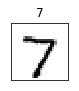

In [7]:
# ******
# 숫자 보기
# *****
labels = sess.run(model,
                  feed_dict={X: mnist.test.images,
                             Y: mnist.test.labels,
                             keep_prob: 1})

fig = plt.figure()
for i in range(10):
    subplot = fig.add_subplot(2, 5, i+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d'  % np.argmax(labels[i]))
    subplot.imshow(mnist.test.images[i].reshape((28,28)),
                   cmap=plt.cm.gray_r)

    plt.show()